# COLX 521 Lab Assignment 1: Strings

## Assignment Objectives

This assignment will
- give you some more practice with the basic string methods available in Python
- have you iterate over NLTK corpora
- give you some practice in teamword and code review

Some notes:

- Exercises marked with a "T" (ie, T.1, etc.) are teamwork assignments.  They should be completed with your teammates.  Please see the teams folder in the Students repo for your teammates.
- If an exercise does not have a "T", it must be completed individually.
- Assert statements are not to be changed.  These act as tests that your code is returning the correct values.  You are welcome (and it's good practice) to write new tests to test your code.  Writing tests to validate your code helps you check for special cases, and ensures that you know what your data looks like.  Take a look at the given assertions for ideas of how to write them, but typically, edge cases are good things to check (how does your code handle weird things?).  Take a look at the data, and see what the results should look like - and then assert that they do.  This does not mean running your code, and then writing an assertion that it passes.
- Optional assignments are meant to further your understanding of the material beyond what we go through in class.  They are optional, but the highest grade you can achieve without attempting them is 95%.
- Code review: Code review is a process whereby previously-written code is scanned for bugs, inefficiencies, quality, and readability.  The reviewer can be the original author of the code, but often, it is not.  Reading code written by other authors is an important skill, as you will often be contributing to codebases developed by other team members.  Many companies have policies that code must be reviewed before being accepted to the project repo (and this will be a requirement of your Capstones, as well).  It's best to perform review on small pieces of code - research has shown that as the amount of code that needs to be reviewed increases, the number of bugs that slip by review also increases.  This is also a good way to study for tests, and to prepare for interview questions.

## Getting Started

This assignment requires that you have downloaded following NLTK corpora/lexicons

In [1]:
# provided code
import nltk
nltk.download("treebank")
nltk.download("brown")
nltk.download("reuters")

[nltk_data] Downloading package treebank to
[nltk_data]     /Users/jungyeul/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package brown to /Users/jungyeul/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package reuters to
[nltk_data]     /Users/jungyeul/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


True

Run the code below so you can access them

In [2]:
# provided code
from nltk.corpus import treebank,brown,reuters,stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud

## Tidy Submission

rubric={mechanics:1}

To get the marks for tidy submission:

- Submit the assignment by filling in this jupyter notebook with your answers embedded
- Be sure to follow the [general lab instructions](https://ubc-mds.github.io/resources_pages/general_lab_instructions)

### Exercise T.1: POS-tagged sentence to string

rubric={accuracy:3,quality:1}

Part-of-speech (POS) tagged sentences from the Brown corpus accessed by iterating using the <i>tagged_sents</i> method look like this:

\[('The', 'AT'), ('Hartsfield', 'NP'), ('home', 'NR'), ('is', 'BEZ'), ('at', 'IN'), ('637', 'CD'), ('E.', 'NP'), ('Pelham', 'NP'), ('Rd.', 'NN-TL'), ('Aj', 'NN'), ('.', '.')\]

That is, they are lists of (word, part-of-speech) tuples, where both word and the POS are strings. You'll notice that the POS tags for words like "Hartsfield" and "home" start with "N", indicating these are nouns, see [the wikipedia entry for the Brown corpus](https://en.wikipedia.org/wiki/Brown_Corpus#Part-of-speech_tags_used) for more infomation about the meanings of these tags.  Verbs start with "V", adjectives start with "J", and adverbs start with "R".

The default structure of the Brown corpus works very well for algorithms, but isn't as helpful for humans - you are going to be converting the sentences in <i>tagged_sents</i> to a more human-readable format.

In this exercise you will convert a sentence of the Brown corpus to a single string (appropriate for writing to disk) that looks like this:

the/AT hartsfield/NP home/NR is/BEZ at/IN 637/CD e./NP pelham/NP rd./NN Aj/NN ./.

Note the following changes:
- the sentence has been converted into a single string (it's no longer a list of tuples of strings)
- the words are now lowercase (ie, no capital letters)
- any POS tag with a hyphen consists only of the part before the hyphen (the marking after the hyphen contains information that is not included in most POS tagsets - it's extra information we often don't care about as much)
- Each word and part of speech tag is separated by a forward slash (/)
- Each word/pos pair is separated by a space.

Do this for the first sentence of the Brown corpus, which has already been extracted for you. Assign the result to the variable `string_sent` and check you have done this correctly using the provided asserts.  Tip: it's often a good idea to look at your data before you start writing your code.  Likewise, print statements in your code as you are developing it are a good way to watch the status of the data as the problem evolves.  These can be commented out (or removed completely) once your code is thoroughly debugged.

In [8]:
tagged_sent = brown.tagged_sents()[-1]
print(tagged_sent)

# your code here
    # lower()
    # trim POS (eg. NN-TL --> NN)
    # change the format (eg. `from/IN`)

# print(string_sent)

[('From', 'IN'), ('what', 'WDT'), ('I', 'PPSS'), ('was', 'BEDZ'), ('able', 'JJ'), ('to', 'IN'), ('gauge', 'NN'), ('in', 'IN'), ('a', 'AT'), ('swift', 'JJ'), (',', ','), ('greedy', 'JJ'), ('glance', 'NN'), (',', ','), ('the', 'AT'), ('figure', 'NN'), ('inside', 'IN'), ('the', 'AT'), ('coral-colored', 'JJ'), ('boucle', 'NN'), ('dress', 'NN'), ('was', 'BEDZ'), ('stupefying', 'VBG'), ('.', '.')]


In [7]:
assert string_sent == "from/IN what/WDT i/PPSS was/BEDZ able/JJ to/IN gauge/NN in/IN a/AT swift/JJ ,/, greedy/JJ glance/NN ,/, the/AT figure/NN inside/IN the/AT coral-colored/JJ boucle/NN dress/NN was/BEDZ stupefying/VBG ./."
print("Success!")

Success!


### Exercise T.2: Exploring the Reuters corpus
rubric={accuracy:3,quality:1}

NLTK provides access to the `reuters` corpus, which is a collection of Reuters new articles labelled by topic. Adapting the code from the lecture, please provide *a single* line of code that outputs each of the following:

* The size of the corpus, in word tokens

1720901

token vs. type ...

\# of token vs. \# of type ...

* The number of word types, after lowercasing:

31078

* The topics (`categories()`) included in the corpus

['acq',
 'alum',
 'barley',
 'bop',
 'carcass',
 'castor-oil',
 'cocoa',
 'coconut',
 'coconut-oil',
 'coffee',
 'copper',
 'copra-cake',
 'corn',
 'cotton',
 'cotton-oil',
 'cpi',
 'cpu',
 'crude',
 'dfl',
 'dlr',
 'dmk',
 'earn',
 'fuel',
 'gas',
 'gnp',
 'gold',
 'grain',
 'groundnut',
 'groundnut-oil',
 'heat',
 'hog',
 'housing',
 'income',
 'instal-debt',
 'interest',
 'ipi',
 'iron-steel',
 'jet',
 'jobs',
 'l-cattle',
 'lead',
 'lei',
 'lin-oil',
 'livestock',
 'lumber',
 'meal-feed',
 'money-fx',
 'money-supply',
 'naphtha',
 'nat-gas',
 'nickel',
 'nkr',
 'nzdlr',
 'oat',
 'oilseed',
 'orange',
 'palladium',
 'palm-oil',
 'palmkernel',
 'pet-chem',
 'platinum',
 'potato',
 'propane',
 'rand',
 'rape-oil',
 'rapeseed',
 'reserves',
 'retail',
 'rice',
 'rubber',
 'rye',
 'ship',
 'silver',
 'sorghum',
 'soy-meal',
 'soy-oil',
 'soybean',
 'strategic-metal',
 'sugar',
 'sun-meal',
 'sun-oil',
 'sunseed',
 'tea',
 'tin',
 'trade',
 'veg-oil',
 'wheat',
 'wpi',
 'yen',
 'zinc']

* The topics associated with the document labelled 'test/14840': (we are still using `categories()`)

['coffee', 'lumber', 'palm-oil', 'rubber', 'veg-oil']

* The number of documents which are labelled with the "gold" topic (`fileids()`)

124

* The total number of sentences in documents which have the "housing" topic (`sents(categories="..")`)

139

Finally, create a word cloud for the "coffee" topic, excluding stopwords (this will take more than one line).

In [11]:
#provided code
stopwords_set = stopwords.words("English")

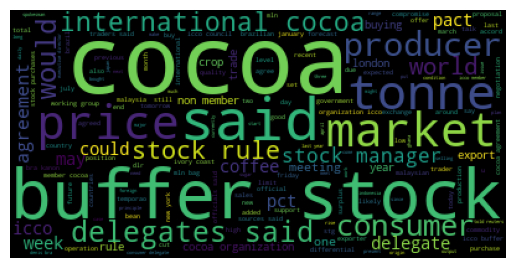

In [12]:
# for `generate()`:
# 1. make a list of words `categories="cocoa"`
# 2. join as a big string to put it in `generate()`

wordcloud = WordCloud(...).generate(...)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Exercise 1: Slicing and String Manipulation

Your thoroughly artificial goal in this exercise is to produce a given string without actually writing any string literals.  Recall that a string literal has the text explicitly listed within ""s (ie, "This is a string literal".  Instead, you will make use of slicing and string operations to turn existing strings into other strings. Two string literals are provided for you to use in the box below; **DO NOT WRITE MORE** (i.e. ' or " should <b>not</b> appear in your code, if they do you will get no points). You can manipulate these string literals using any of the methods and operators for manipulating stings in Lecture 1, including indexing (\[\]), slicing(\[:\]), concenation(+), <i>split</i>, <i>join</i>, <i>replace</i>, and <i>strip</i>. You should provide the most compact solution you can come up with. Feel free to declare temporary variables, as long as you aren't assigning string literals. An example is provided for you.

In [14]:
# provided code
S = "farmer jack realized that big yellow quilts were expensive."
space = " "

the

In [15]:
# provided code
S[:11]

'farmer jack'

#### 1.1
rubric={correctness:1}

expensive

'expensive.'

#### 1.2
rubric={correctness:1}

big quilts

'big quilts'

#### 1.3
rubric={correctness:1}

big yellow quilts are expensive farmer jack

In [20]:
S[26:44] +  S[1] + S[-13:-1] + S[6] + S[:11]

'big yellow quilts are expensive farmer jack'

#### 1.4
rubric={correctness:1}

farmer jill

In [21]:
S[:11].replace(S[8:11],S[27]) + S[32:34]

'farmer jill'

#### 1.5
rubric={correctness:1}

geo (don't use "+")

'geo'

#### 1.6
rubric={correctness:1}

expensive quilts were yellow

['farmer', 'jack', 'realized', 'that', 'big', 'yellow', 'quilts', 'were', 'expensive.']


'expensive quilts were yellow'

#### 1.7
rubric={correctness:1}

farmerojackorealizedothatobigoyellowoquiltsowereoexpensive.

'farmerojackorealizedothatobigoyellowoquiltsowereoexpensive.'

### Exercise 2: Building word lists

In this exercise, you'll be creating lists of words from the Brown corpus which have some particular property. You should iterate over each word in the corpus (using a <i>for</i> loop and the <i>words</i> method), and add to it the list (using append) if it is the kind of word you're looking for. Then you should print out the length of the list as well as the first five examples you found (remember that slicing also works for lists!). It is okay if you repeat the code for iterating over the Brown in each cell (also okay if you decompose this and use a function!)

#### 2.1
rubric={accuracy:1}

Find words which contain the lowercase letter q

In [25]:
word_list = []
#your code here
for word in brown.words():
    # if word contains 'q':
    #   do something

#your code here
print(len(word_list))
print(word_list[:5])


4861
['inadequate', 'equitable', 'requesting', 'quickie', 'Colquitt']


In [26]:
assert len(word_list) == 4861
assert "equation" in word_list
assert "laughable" not in word_list
print("Success!")

Success!


#### 2.2
rubric={accuracy:1}

Find words that have a capital letter, but are not capitalized (ie, a capital letter somewhere other than the start of the word)

In [27]:
word_list = []
#your code here
for word in brown.words():
    # if ... :
    #   do something

print(len(word_list))
print(word_list[:5])
#your code here

284
['pro-Western', 'pro-Western', 'pro-Western', 'pro-Communist', 'ex-National']


In [29]:
assert len(word_list) == 284
assert "color-TV" in word_list
assert "TV" not in word_list
print("Success!")

Success!


#### 2.3
rubric={accuracy:2}

Find doubled consonant verbs (ie, verbs longer than 6 letters that double the consonant before the ending).  You can limit it to the -ing and -ed endings.

In [30]:
word_list = []
#your code here
vowels = {"a","e","i","o","u","y"}
for word, pos in brown.tagged_words():
    # ... 
    
print(len(word_list))
print(word_list[:5])
#your code here

4247
['getting', 'allotted', 'missing', 'permitting', 'getting']


In [31]:
assert len(word_list) == 4247
assert "beginning" in word_list
assert "seeing" not in word_list
print("Success!")

Success!


#### 2.4
rubric={accuracy:2}

Find entirely alphabetic words which contain only vowels. Your solution should be case insensitive! To eliminate the trivial "a" and "I" cases, make sure the words are at least 3 letters long.

In [32]:
word_list = []
#your code here
vowels = {"a","e","i","o","u","y"}
for word in brown.words():
    # if ... 
    
print(len(word_list))
print(word_list[:5])
#your code here

3430
['you', 'you', 'You', 'You', 'eye']


In [33]:
assert len(word_list) == 3430
assert "Yea" in word_list
assert "the" not in word_list
print("Success!")

Success!


#### 2.5  Code Review
rubric={accuracy:1, quality:1, writing:1}

Find all words which contain a single hyphen and each of the parts of the hypenated word is at least four letters.

Code Review: A sample solution is provided; however, it is not very good code.  Your goal is to improve the solution so that it solves the same problem, but with better code.  A good code review comments on any code that is inefficient, overly-complex where it doesn't need to be, or hard to read.  Comment on any features of the code that can be improved (you will then improve them in your solution).  Also note that although this code is buggy, it passes the assertions.  Passing assertions is not proof, in itself, that code is bug-free (although the more tests it passes, the more likely it is to be free of bugs).

In [34]:
word_list = []

for x in brown.words():
    for i, y in enumerate(x):
        if(y == "-" and i >= 4 and len(x) >= i+1+4):
            word_list.append(x)
    if(len(word_list) == 4509):
        break
print(len(word_list))
print(word_list[:5])

4509
['September-October', 'hard-fought', 'Mayor-nominate', 'multi-million-dollar', 'multi-million-dollar']


In [35]:
assert len(word_list) == 4509
assert "hard-fought" in word_list
assert "hard-won" not in word_list
print("Success!")

Success!


Your writeup here.
Please provide a short paragraph (4-5 sentences) that provides constructive criticism for how the
above code could be improved.  Please do not simply provide bullet points.


The above code is very difficult to read, and inefficient, as well.
Looping through each character in a word, and ensuring that the first part is at least 4 characters
can be achieved much easier (such as with split("-").  The variable names are uninformative (x, i, y are not good variable names), and it takes some interpretation to understand the 1+4+x part of the if statement.  The code also does not provide a check that the word only consists of two hyphenated parts (it only checks that there are at least 2 parts, and that the second has at least 4 characters).  The check for 4509 words is dangerous - it forces the code to pass the assertion, without trying to actually fix the code.

In [32]:
word_list = []

#your code here

print(len(word_list))
print(word_list[:5])
#your code here

4509
['September-October', 'hard-fought', 'Mayor-nominate', 'county-wide', 'small-town']


In [33]:
assert len(word_list) == 4509
assert "hard-fought" in word_list
assert "hard-won" not in word_list
print("Success!")

Success!
